In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
import cv2
from pathlib import Path

import random
from collections import defaultdict

import zipfile

import albumentations as A
#from albumentations.augmentations.transforms import GaussianNoise

In [ ]:
images_dir = Path("/content/drive/MyDrive/Dataset Pre-Processing PCD/images")
labels_dir = Path("/content/drive/MyDrive/Dataset Pre-Processing PCD/labels")
output_dir = Path("/content/cropped_faces")
output_dir.mkdir(parents=True, exist_ok=True)

# Load Cropped Image

In [ ]:
def crop_from_yolo(image_path, label_path):
    img = cv2.imread(str(image_path))
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        lines = f.readlines()

        for i, line in enumerate(lines):
            parts = line.strip().split()
            class_id, x_center, y_center, bw, bh = map(float, parts)

            x1 = int((x_center - bw/2) * w)
            y1 = int((y_center - bh/2) * h)
            x2 = int((x_center + bw/2) * w)
            y2 = int((y_center + bh/2) * h)

            cropped = img[y1:y2, x1:x2]

            base_name = image_path.stem
            if len(lines) == 1:
                out_name = f"{base_name}.jpg"
            else:
                out_name = f"{base_name}_face{i+1}.jpg"

            out_path = output_dir / out_name
            cv2.imwrite(str(out_path), cropped)

In [ ]:
for img_file in images_dir.glob("*.jpg"):
    label_file = labels_dir / (img_file.stem + ".txt")
    if label_file.exists():
        crop_from_yolo(img_file, label_file)

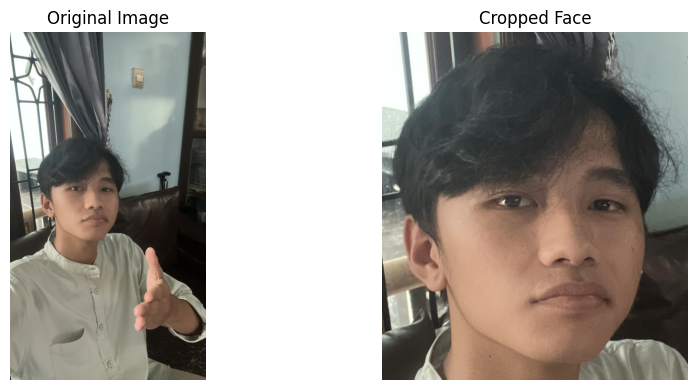

In [ ]:
original_path = "/content/drive/MyDrive/Dataset Pre-Processing PCD/Full/Salinan Abay_Indoor.jpeg"
cropped_path = "/content/cropped_faces/Abay_Indoor_jpeg.rf.fee15f05e9680358b4dceb03cac91295.jpg"

original_img = cv2.cvtColor(cv2.imread(original_path), cv2.COLOR_BGR2RGB)
cropped_img = cv2.cvtColor(cv2.imread(cropped_path), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cropped_img)
plt.title("Cropped Face")
plt.axis("off")

plt.tight_layout()
plt.show()

# Custom Train Validation Test Split

In [ ]:
random.seed(42)

crop_dir = Path("/content/cropped_faces")
all_files = list(crop_dir.glob("*.jpg"))

person_files = defaultdict(list)

for f in all_files:
    filename = f.name
    person_name = filename.split("_")[0].lower()
    person_files[person_name].append(filename)

all_people = list(person_files.keys())
random.shuffle(all_people)

n = len(all_people)
n_train = int(0.7 * n)
n_val = int(0.15 * n)
n_test = n - n_train - n_val

train_people = all_people[:n_train]
test_people = all_people[n_train:n_train + n_test]
val_people = all_people[n_train + n_test:]

train_files = [f for p in train_people for f in person_files[p]]
test_files  = [f for p in test_people  for f in person_files[p]]
val_files   = [f for p in val_people   for f in person_files[p]]

with open("train.txt", "w") as f:
    f.writelines([str(f"{x}\n") for x in train_files])
with open("test.txt", "w") as f:
    f.writelines([str(f"{x}\n") for x in test_files])
with open("val.txt", "w") as f:
    f.writelines([str(f"{x}\n") for x in val_files])

print(f"Total Orang: {n}")
print(f"Train: {len(train_people)} orang, {len(train_files)} file")
print(f"Test: {len(test_people)} orang, {len(test_files)} file")
print(f"Val: {len(val_people)} orang, {len(val_files)} file")


Total Orang: 9
Train: 6 orang, 21 file
Test: 2 orang, 12 file
Val: 1 orang, 2 file


In [ ]:
train_files

['Tian_Jauh_jpg.rf.1b89a1657751c4277d9b7ce431e21f90.jpg',
 'Tian_Serius_jpeg.rf.5fe2267709121d75f518af7e5a430567.jpg',
 'Tian_Outdoor_jpeg.rf.af631d53901beb228b4922fdeccda24f.jpg',
 'Ambon_Jauh_jpg.rf.290dcff1e53aa6fa0657042fac547593.jpg',
 'Rizal_Jauh_jpg.rf.360f662813fd83f0556ee6714d504eff.jpg',
 'Rizal_Serius_jpg.rf.30dd1d2e5bf0f37d7a94dad62d99c048.jpg',
 'Ahmad_Outdoor_jpg.rf.45ca4a8c59f35edbfa16b4e0e7b2857e.jpg',
 'Ahmad_Serius_jpg.rf.ddb7fa729fed82b26632226c029e8810.jpg',
 'Ahmad_Senyum_jpg.rf.3332f1cd5376609d9c65ebfa6a7d742e.jpg',
 'Ahmad_Dekat_jpg.rf.1cdd244b80c518599fc2b365b0747c05.jpg',
 'Akbar_Jauh_jpg.rf.2c732a4d47aef7c9312e804ae81ecc06.jpg',
 'Akbar_Senyum_jpg.rf.fa804ef6880596258cc77f14d99341d2.jpg',
 'Akbar_Serius_jpg.rf.d5889ab8233f10d25fb795526f404525.jpg',
 'Akbar_Outdoor_jpg.rf.0e5ebe80690bcc5bb951c7dd91a13c8b.jpg',
 'Akbar_Dekat_jpg.rf.6241fb86acba26dcdf5633987d7c6903.jpg',
 'Akbar_Indoor_jpg.rf.fade522048a21c1d4c1f7897d041c1a4.jpg',
 'Abay_Indoor_jpeg.rf.fee15f05e9

In [ ]:
val_files

['Ibrahim_dekat_jpg.rf.dc2e5e7b8b5fd3580a0fb324b4f0e09f.jpg',
 'Ibrahim_Indoor_jpg.rf.2b7574a31a3a405fcde56b553c6fead0.jpg']

In [ ]:
test_files

['Humsans_Indoor_jpg.rf.e9797ad4c613c43c2ab2fd8a654c0c44.jpg',
 'Humsans_Dekat_jpg.rf.b3d3f9c05f4ed9027d474f6b1e6f894b.jpg',
 'Humsans_Outdoor_jpg.rf.4536ae7e8bbeee32d8a2b21a43969016.jpg',
 'Humsans_Senyum_jpg.rf.1fbc5b7bc402263ab39c23885b02a137.jpg',
 'Humsans_Serius_jpg.rf.bf59717c44b346fc2d205259bb84cc53.jpg',
 'Humsans_Jauh_jpg.rf.3fb794499a569ba86788f0c975365f35.jpg',
 'Faris_Jauh_jpg.rf.95c64843ba836e86e023b2f8d30bde0d.jpg',
 'Faris_Serius_jpg.rf.371962014a055d393e8d4a3d364c0c66.jpg',
 'Faris_Outdoor_jpg.rf.4fbff492b4f961177e242455aba480a7.jpg',
 'Faris_Senyum_jpg.rf.ec89a656a887a45502f6b93d51894e15.jpg',
 'Faris_dekat_jpg.rf.5a3e8208edd8f7af753e7898f84d01e5.jpg',
 'Faris_Indoor_jpg.rf.0605c04778fa492f466dfca6f2bda0ca.jpg']

# Augmentation

In [ ]:
train_txt = Path("train.txt")
crop_dir = Path("/content/cropped_faces")
aug_dir = Path("/content/augmented_faces")
aug_dir.mkdir(parents=True, exist_ok=True)

Total gambar baru: 63 gambar


In [ ]:
with open(train_txt, "r") as f:
    train_files = [line.strip() for line in f.readlines()]

transform = A.Compose([
    A.Rotate(limit=15, p=0.8),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.7),
])

N_AUG = 3

In [ ]:
for file_name in train_files:
    img_path = crop_dir / file_name
    image = cv2.imread(str(img_path))

    for i in range(N_AUG):
        augmented = transform(image=image)["image"]
        out_name = f"{Path(file_name).stem}_aug{i+1}.jpg"
        out_path = aug_dir / out_name
        cv2.imwrite(str(out_path), augmented)

print(f"Total gambar baru: {len(train_files) * N_AUG} gambar")

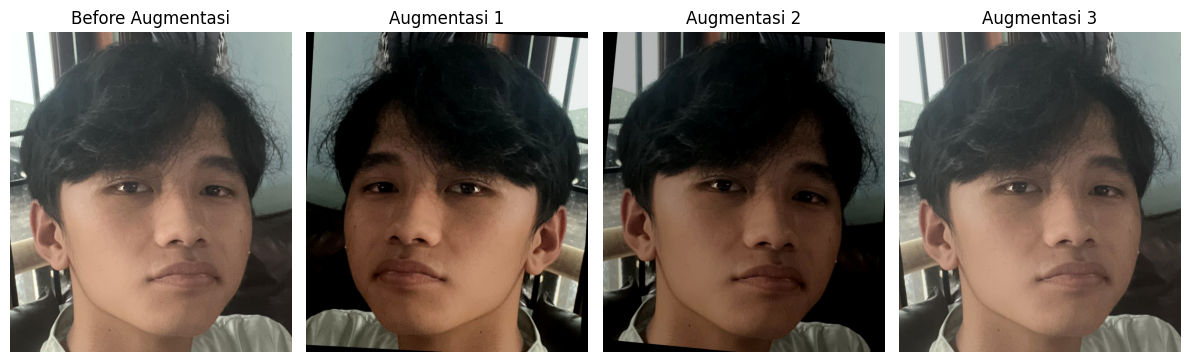

In [ ]:
before = "/content/cropped_faces/Abay_Indoor_jpeg.rf.fee15f05e9680358b4dceb03cac91295.jpg"
after = [
    "/content/augmented_faces/Abay_Indoor_jpeg.rf.fee15f05e9680358b4dceb03cac91295_aug1.jpg",
    "/content/augmented_faces/Abay_Indoor_jpeg.rf.fee15f05e9680358b4dceb03cac91295_aug2.jpg",
    "/content/augmented_faces/Abay_Indoor_jpeg.rf.fee15f05e9680358b4dceb03cac91295_aug3.jpg"
]

before_img = cv2.cvtColor(cv2.imread(before), cv2.COLOR_BGR2RGB)
after_imgs = [cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB) for p in after]

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(before_img)
plt.title("Before Augmentasi")
plt.axis("off")

for i, img in enumerate(after_imgs):
    plt.subplot(1, 4, i + 2)
    plt.imshow(img)
    plt.title(f"Augmentasi {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()